<img src='./img/logo_fire_workshop.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='40%'></img>

<br>

<a href="./61_case_study_siberian_fires_summer_2019.ipynb"><< 61 - Case study Siberian Fires Summer 2019 </a><span style="float:right;"><a href="./00_index.ipynb">Index >></a></span>

# Case study - Sweden fires - Summer 2018

In the summer of 2018, a large number of wildfires (primarily forest fires) occurred throughout much of Sweden. According to the Swedish Civil Contingencies Agency, they are the most serious in the country in modern history. The summer was unusually warm and dry, significantly raising the risk of fire. Firefighters from multiple countries were involved in fighting the fires. Many people were evacuated from their homes, but there were no fatalities.

Several of the fires were started by people using disposable barbecues, though bans on these were in place due to the weather conditions. Some were started by lightning strikes. Wildfires also occurred in the neighbouring countries Denmark, Finland and Norway, but no casualties due to wildfires were reported in Scandinavia.
([Source](https://en.wikipedia.org/wiki/2018_Sweden_wildfires)).

Most of the active fires detected by the MODIS instruments was in the far west of Attica, close to the border with Corinthia, with a weaker signal detected in the eastern coastal region of Attica on 23/24 July.


The dynamics and extent of the fires were monitored by different sensors and data. This notebook covers the following data products:

- [Sentinel-5P TROPOMI Aerosol Index](#sentinel_5p_ai)
- [Sentinel-5P TROPOMI Carbon Monoxide](#sentinel_5p_co)


- [GEFF HRES Forecast](#geff_hres_forecast)
- [GEFF ENS Forecast](#geff_ens_forecast)
- [GEFF HRES Reanalysis](#geff_hres_reanalysis)
- [GEFF ENS Reanalysis](#geff_ens_reanalysis)
- [GEFF Harmonized Danger Classes](#geff_danger_classes)


- [LSA SAF NRT 10-days Fraction of Absorbed Photosynthetic Active Radiation](#lsa_saf_etfapar)
- [LSA SAF EPS Daily Land Surface Temperature](#lsa_saf_edlst)
- [LSA SAF Fire Radiative Power Pixel](#lsa_saf_frp_pixel)
- [LSA SAF Normalized Difference Vegetation Index](#lsa_saf_ndvi)




<hr>

#### Load required libraries

In [2]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import ipynb
from skimage import exposure
import h5py

from netCDF4 import Dataset
import pandas as pd

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from matplotlib.colors import BoundaryNorm, ListedColormap

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Helper functions

In [218]:
from ipynb.fs.full.functions import visualize_imshow, visualize_pcolormesh, hdrdtypelib


<hr>

## <a id='sentinel_5p_ai'></a>Sentinel-5p UV Aerosol Index

Follow the individual steps as shown [here](./61_case_study_siberian_fires_summer_2019.ipynb#sentinel_5p_ai).

#### 1. Load the dataset with xarray's function `xr.open_mfdataset`

In [202]:
# Add your solution here





In [190]:
s5p_mf = xr.open_mfdataset('./eodata/sentinel5p/UVAI/2018/07/17/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf

<xarray.Dataset>
Dimensions:                          (corner: 4, ground_pixel: 450, scanline: 3245, time: 1)
Coordinates:
  * ground_pixel                     (ground_pixel) float64 0.0 1.0 ... 449.0
  * corner                           (corner) float64 0.0 1.0 2.0 3.0
  * time                             (time) datetime64[ns] 2018-07-17
  * scanline                         (scanline) float64 0.0 1.0 ... 3.244e+03
    latitude                         (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
    longitude                        (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
Data variables:
    delta_time                       (time, scanline) timedelta64[ns] dask.array<chunksize=(1, 3245), meta=np.ndarray>
    time_utc                         (time, scanline) object dask.array<chunksize=(1, 3245), meta=np.ndarray>
    qa_value                         (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
    aerosol_index_354_388            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
    aerosol_index_340_380            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
    aerosol_index_354_388_precision  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
    aerosol_index_340_380_precision  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>

#### 2. Select `aerosol_index_340_380` variable together with `latitude` and `longitude`

In [203]:
# Add your solution here





In [191]:
uvai = s5p_mf_uvai.aerosol_index_340_380[0,:,:]
lat = uvai.latitude
lon = uvai.longitude


#### 3. Load the `qa_value` for quality assurance

In [204]:
# Add your solution here





In [193]:
qa=s5p_mf_uvai.qa_value[0,:,:]

#### 4. Mask the data based on a `qa_value` higher than 0.8

In [205]:
# Add your solution here





In [195]:
uvai_masked=uvai.where(qa > 0.8)

#### Define some variables for plotting

In [206]:
unit = uvai.units
long_name = uvai.long_name
vmin = 0.0
vmax = 4

latmin=55
latmax=69
lonmin=10.1
lonmax=24.8

#### 5. Visualize the masked AAI data with function `visualize_pcolormesh`

In [196]:
# Add your solution here





(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9b6c26d978>)

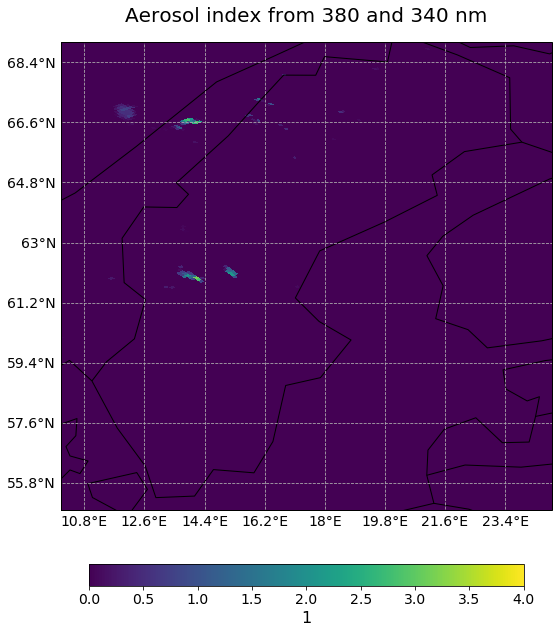

In [197]:
visualize_pcolormesh(uvai_masked, 
                     lon, 
                     lat, 
                     ccrs.PlateCarree(), 
                     'viridis', 
                     unit, 
                     long_name, 
                     vmin, 
                     vmax, 
                     lonmin, 
                     lonmax, 
                     latmin, 
                     latmax, 
                     log=False, 
                     set_global=False)

## <a id='sentinel_5p_co'></a> Sentinel-5p Carbon Monoxide

Follow the individual steps as shown [here](./61_case_study_siberian_fires_summer_2019.ipynb#sentinel_5p_co).

#### 1.  Load the data with xarray's function `xr.open_mfdataset`

In [207]:
# Add your solution here





In [214]:
s5p_mf = xr.open_mfdataset('./eodata/sentinel5p/co/2018/07/17/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf

<xarray.Dataset>
Dimensions:                                (corner: 4, ground_pixel: 215, layer: 50, scanline: 6490, time: 1)
Coordinates:
  * layer                                  (layer) float32 49500.0 ... 500.0
  * time                                   (time) datetime64[ns] 2018-07-17
  * ground_pixel                           (ground_pixel) float64 0.0 ... 214.0
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * scanline                               (scanline) float64 0.0 ... 3.244e+03
    latitude                               (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
    longitude                              (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
Data variables:
    delta_time                             (time, scanline) timedelta64[ns] dask.array<chunksize=(1, 3245), meta=np.ndarray>
    time_utc                               (time, scanline) object dask.array<chunksize=(1, 3245), meta=np.ndarray>
    qa_value                               (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
    carbonmonoxide_total_column            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
    carbonmonoxide_total_column_precision  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>

#### 2. Load the variable `carbonmonoxide_total_column` together with `latitude` and `longitude` information

In [211]:
# Add your solution here





In [212]:
co = s5p_mf.carbonmonoxide_total_column[0,:,:]
lat = co.latitude
lon = co.longitude


#### Define some variables for plotting

In [210]:
unit = co.units
long_name = co.long_name
vmin = 0.01
vmax = 1

latmin=55
latmax=69
lonmin=10.1
lonmax=24.8

#### 3. Visualize the Carbon Monoxide Total Column with the function `visualize_pcolormesh`

In [213]:
# Add your solution here





(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9bd02679b0>)

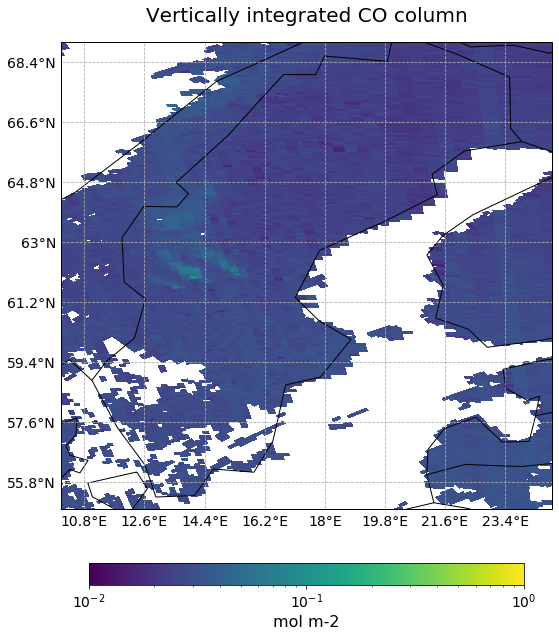

In [28]:
visualize_pcolormesh(co, lon, lat, ccrs.PlateCarree(), 'viridis', unit, long_name, vmin, vmax, lonmin, lonmax, latmin, latmax, log=True, set_global=False)


<br>

## <a id='geff_hres_forecast'></a>GEFF HRES Forecast

Follow the individual steps as shown [here](./61_case_study_siberian_fires_summer_2019.ipynb#geff_fwi).

#### 1. Load the following file with `xr.open_dataset`:  `eodata/geff/sweden/rt_hr/ECMWF_FWI_20180716_1200_hr_fwi_rt.nc`

This dataset provides real-time high-resolution deterministic (~9 Km) fire danger forecasts up to 10 days ahead. Let us explore the content of the sample file.

In [ ]:
# Add your solution here





In [136]:
# Open the dataset
ds_rt_hr = xr.open_dataset("./eodata/geff/sweden/rt_hr/ECMWF_FWI_20180716_1200_hr_fwi_rt.nc")
ds_rt_hr

<xarray.Dataset>
Dimensions:  (lat: 200, lon: 209, time: 10)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-16 2018-07-17 ... 2018-07-25
  * lon      (lon) float32 10.125 10.1953125 10.265625 ... 24.679688 24.75
  * lat      (lat) float32 68.99824 68.92794 68.85764 ... 55.079086 55.008785
Data variables:
    fwi      (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.6 (http://mpimet.mp...
    history:           Mon May 04 15:23:16 2020: cdo --silent sellonlatbox,10...
    Conventions:       CF-1.6
    Reference date:    20180716
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    NCO:               4.6.7
    CDO:               Climate Data Operators version 1.9.6 (http://mpimet.mp...

#### 2. Select the `fwi` variable for Fire Weather Index

In [ ]:
# Add you solution here





In [137]:
da_rt_hr = ds_rt_hr.fwi
da_rt_hr

<xarray.DataArray 'fwi' (time: 10, lat: 200, lon: 209)>
[418000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2018-07-16 2018-07-17 ... 2018-07-25
  * lon      (lon) float32 10.125 10.1953125 10.265625 ... 24.679688 24.75
  * lat      (lat) float32 68.99824 68.92794 68.85764 ... 55.079086 55.008785
Attributes:
    units:    -
    title:    Fire Weather Index

#### 3. Visualize the `DataArray` with the function `visualize_pcolormesh`

In [ ]:
# Add your solution here





(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9b6ce288d0>)

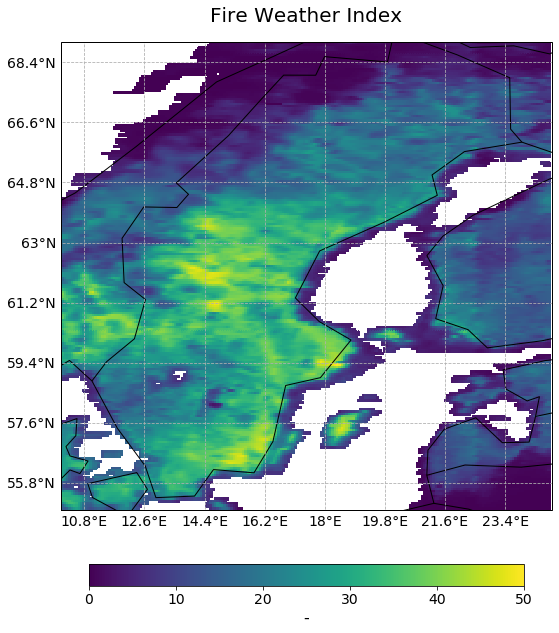

In [161]:
visualize_pcolormesh(da_rt_hr[0],
                     da_rt_hr.lon,
                     da_rt_hr.lat,
                     ccrs.PlateCarree(),
                     'viridis',
                     da_rt_hr.units,
                     da_rt_hr.title,
                     0,
                     50,
                     10.1,
                     24.8,
                     55,
                     69,
                     log=False,
                     set_global=False)

## <a id='geff_ens_forecast'></a>GEFF ENS Forecast

#### 1. Load the following file with `xr.open_dataset`:  `eodata/geff/sweden/rt_en/ECMWF_FWI_20180715_1200_hr_fwi_rt.nc`

This dataset provides real-time probabilistic (~18 Km) fire danger forecasts up to 10 days ahead. Each member of the ensemble has similar structure to the HRES but lower resolution.

In [ ]:
# Add your solution here





In [147]:
ds_e5_rt = xr.open_dataset("./eodata/geff/sweden/rt_en/ECMWF_FWI_20180715_1200_00_fwi_rt.nc")
ds_e5_rt

<xarray.Dataset>
Dimensions:  (lat: 100, lon: 105, time: 10)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-15 2018-07-16 ... 2018-07-24
  * lon      (lon) float32 10.125 10.265625 10.40625 ... 24.609375 24.75
  * lat      (lat) float32 68.949615 68.809044 68.66848 ... 55.173756 55.033184
Data variables:
    fwi      (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.6 (http://mpimet.mp...
    history:           Mon May 04 21:16:23 2020: cdo --silent sellonlatbox,10...
    Conventions:       CF-1.6
    Reference date:    20180715
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    NCO:               4.6.7
    CDO:               Climate Data Operators version 1.9.6 (http://mpimet.mp...

#### 2. Load the `fwi` data variable and extract the data for a geographical subset for Sweden (latmin=55, latmax=69, lonmin=10.1, lonmax=24.8)

In [ ]:
# Add your solution here





In [163]:
# Convert ds to a dataarray extracting only the variable fwi
da_e5_rt = ds_e5_rt.fwi
fwi_e5_rt = da_e5_rt.loc[dict(lat = slice(69, 55), lon = slice(10.1, 24.8))]
fwi_e5_rt

<xarray.DataArray 'fwi' (time: 10, lat: 100, lon: 105)>
[105000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2018-07-15 2018-07-16 ... 2018-07-24
  * lon      (lon) float32 10.125 10.265625 10.40625 ... 24.609375 24.75
  * lat      (lat) float32 68.949615 68.809044 68.66848 ... 55.173756 55.033184
Attributes:
    units:    -
    title:    Fire Weather Index

#### 3. Visualize the `DaraArray` with the function `visualize_pcolormesh`

In [ ]:
# Add your solution here





(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9b6c8a3c50>)

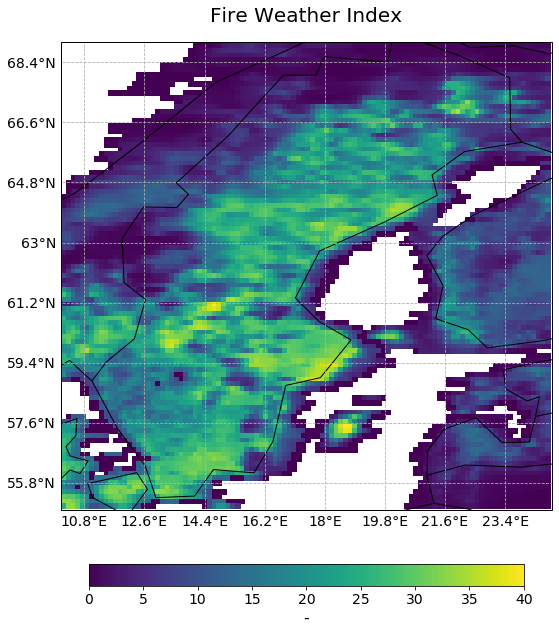

In [172]:
# Plot the raw forecast, Day 10
visualize_pcolormesh(fwi_e5_rt[0],
                     fwi_e5_rt.lon,
                     fwi_e5_rt.lat,
                     ccrs.PlateCarree(),
                     'viridis',
                     fwi_e5_rt.units,
                     fwi_e5_rt.title,
                     0,
                     40,
                     10.1,
                     24.8,
                     55,
                     69,
                     log=False,
                     set_global=False)

## <a id='geff_hres_reanalysis'></a> GEFF HRES reanalysis

Let's repeat the same operations shown above, this time the dataset has only 1 temporal layer.
The regular grid is smaller (640 x 1280) compared to the HRES/ENS forecasts.

The example below shows how to explore the single layer reanalysis. Examples of how to use a reanalysis datacube will be shown in follow-up tutorials.

#### 1. Load the following file with `xr.open_dataset`:  `eodata/geff/sweden/e5_hr/ECMWF_FWI_20180715_1200_hr_fwi_e5.nc`

In [ ]:
# Add your solution here





In [166]:
# Open the dataset
ds_e5_hr = xr.open_dataset("./eodata/geff/sweden/e5_hr/ECMWF_FWI_20180715_1200_hr_fwi_e5.nc")
ds_e5_hr

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 53, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-15
  * lon      (lon) float32 10.125 10.40625 10.6875 ... 24.1875 24.46875 24.75
  * lat      (lat) float32 68.99293 68.7119 68.43087 ... 55.503487 55.222458
Data variables:
    fwi      (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.6 (http://mpimet.mp...
    history:           Mon May 04 14:51:54 2020: cdo --silent sellonlatbox,10...
    Conventions:       CF-1.6
    Reference date:    20180715
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    NCO:               netCDF Operators version 4.7.8 (Homepage = http://nco....
    CDO:               Climate Data Operators version 1.9.6 (http://mpimet.mp...

#### 2. Load the `fwi` data variable and select a geographical subset for Sweden (latmin=55, latmax=69, lonmin=10.1, lonmax=24.8)

In [ ]:
# Add your solution here





In [168]:
# Convert ds to a dataarray extracting only the variable fwi
da_e5_hr = ds_e5_hr.fwi
fwi_e5_hr = da_e5_hr.loc[dict(lat = slice(69, 55), lon = slice(10.1, 24.8))]
fwi_e5_hr

<xarray.DataArray 'fwi' (time: 1, lat: 50, lon: 53)>
array([[[      nan,       nan, ...,  1.407842,  1.478013],
        [      nan,       nan, ...,  3.154715,  3.103113],
        ...,
        [26.642874, 25.67271 , ...,  0.21493 ,  0.231382],
        [19.685387, 23.430803, ...,  0.080796,  0.096352]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-15
  * lon      (lon) float32 10.125 10.40625 10.6875 ... 24.1875 24.46875 24.75
  * lat      (lat) float32 68.99293 68.7119 68.43087 ... 55.503487 55.222458
Attributes:
    units:    -
    title:    Fire Weather Index

#### 3. Visualize the data with the function `visualize_pcolormesh`

In [ ]:
# Add your solution here





(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9b6c9ac4e0>)

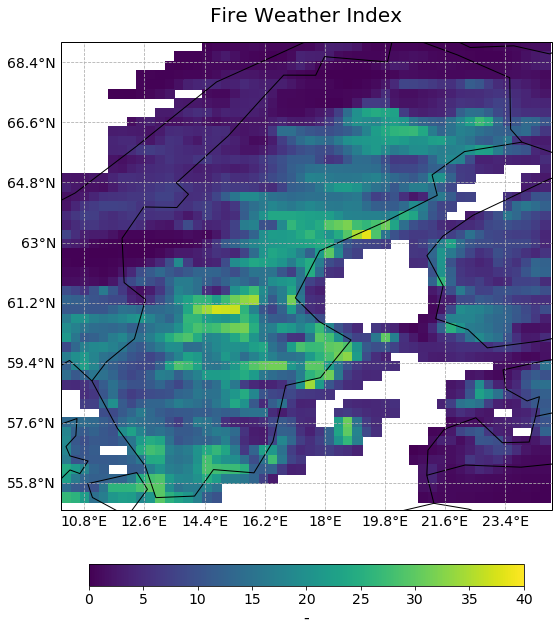

In [171]:
# Plot the raw forecast, Day 10
visualize_pcolormesh(fwi_e5_hr[0],
                     fwi_e5_hr.lon,
                     fwi_e5_hr.lat,
                     ccrs.PlateCarree(),
                     'viridis',
                     fwi_e5_hr.units,
                     fwi_e5_hr.title,
                     0,
                     40,
                     10.1,
                     24.8,
                     55,
                     69,
                     log=False,
                     set_global=False)

## <a id='geff_ens_reanalysis'></a> GEFF ENS reanalysis

Let us repeat the same operations shown above, one last time. The ENS reanalysis dataset of each ensemble member is similar to the HRES reanalysis but the with an even coarser regular grid (320 x 640).

#### 1. Load the following file with `xr.open_dataset`:  `eodata/geff/sweden/e5_en/ECMWF_FWI_20180715_1200_00_fwi_e5.nc`

In [ ]:
# Add your solution here





In [151]:
# Open the dataset
ds_e5_en = xr.open_dataset("./eodata/geff/sweden/e5_en/ECMWF_FWI_20180715_1200_00_fwi_e5.nc")
ds_e5_en

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 27, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-15
  * lon      (lon) float32 10.125 10.6875 11.25 11.8125 ... 23.625 24.1875 24.75
  * lat      (lat) float32 68.79857 68.23695 67.67534 ... 55.881332 55.319714
Data variables:
    fwi      (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.6 (http://mpimet.mp...
    history:           Mon May 04 14:52:57 2020: cdo --silent sellonlatbox,10...
    Conventions:       CF-1.6
    Reference date:    20180715
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    NCO:               netCDF Operators version 4.7.8 (Homepage = http://nco....
    CDO:               Climate Data Operators version 1.9.6 (http://mpimet.mp...

#### 2. Select the `fwi` data variable and select a geographical subset for Sweden  (latmin=55, latmax=69, lonmin=10.1, lonmax=24.8)

In [ ]:
# Add your solution here





In [173]:
da_e5_en = ds_e5_en.fwi
fwi_e5_en = da_e5_en.loc[dict(lat = slice(69, 55), lon = slice(10.1, 24.8))]
fwi_e5_en

<xarray.DataArray 'fwi' (time: 1, lat: 25, lon: 27)>
array([[[         nan,          nan, ..., 2.297178e+00, 3.013260e+00],
        [         nan,          nan, ..., 6.249566e-01, 7.448227e-01],
        ...,
        [1.783144e+01, 1.635963e+01, ..., 3.623094e-01, 2.723388e-01],
        [2.055203e+01, 1.902001e+01, ..., 5.155944e-02, 2.006772e-02]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-15
  * lon      (lon) float32 10.125 10.6875 11.25 11.8125 ... 23.625 24.1875 24.75
  * lat      (lat) float32 68.79857 68.23695 67.67534 ... 55.881332 55.319714
Attributes:
    units:    -
    title:    Fire Weather Index

#### 3. Visualize the data with the function `visualize_pcolormesh`

In [ ]:
# Add your solution here





(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9b6c782ef0>)

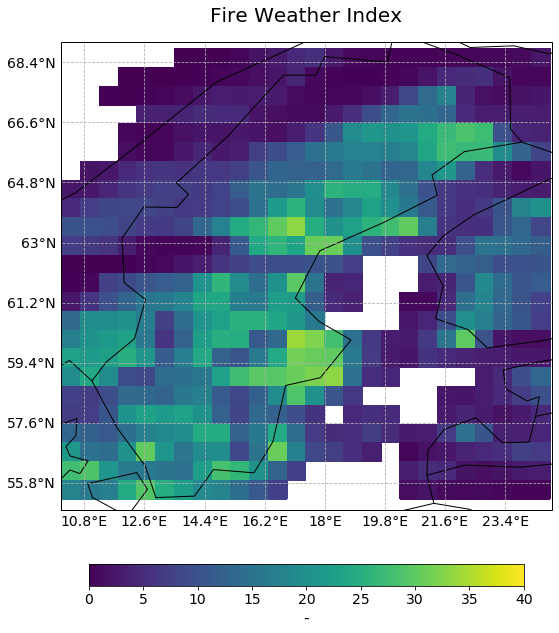

In [174]:
# Plot the raw forecast, Day 10
visualize_pcolormesh(fwi_e5_en[0],
                     fwi_e5_en.lon,
                     fwi_e5_en.lat,
                     ccrs.PlateCarree(),
                     'viridis',
                     fwi_e5_en.units,
                     fwi_e5_en.title,
                     0,
                     40,
                     10.1,
                     24.8,
                     55,
                     69,
                     log=False,
                     set_global=False)

### Calculate the `mean` and `standard deviation (spread)` over multiple days

#### 1. Let us first find the files containing the FWI indices

In [3]:
dir = "./eodata/geff/sweden/e5_en/"
pattern = "ECMWF_FWI"
matching_files = [f for f in os.listdir(dir) if pattern in f]
matching_files

['ECMWF_FWI_20180715_1200_02_fwi_e5.nc',
 'ECMWF_FWI_20180715_1200_01_fwi_e5.nc',
 'ECMWF_FWI_20180715_1200_05_fwi_e5.nc',
 'ECMWF_FWI_20180715_1200_00_fwi_e5.nc',
 'ECMWF_FWI_20180715_1200_04_fwi_e5.nc',
 'ECMWF_FWI_20180715_1200_03_fwi_e5.nc',
 'ECMWF_FWI_20180715_1200_06_fwi_e5.nc',
 'ECMWF_FWI_20180715_1200_07_fwi_e5.nc',
 'ECMWF_FWI_20180715_1200_08_fwi_e5.nc',
 'ECMWF_FWI_20180716_1200_00_fwi_e5.nc',
 'ECMWF_FWI_20180715_1200_09_fwi_e5.nc',
 'ECMWF_FWI_20180716_1200_01_fwi_e5.nc',
 'ECMWF_FWI_20180716_1200_02_fwi_e5.nc',
 'ECMWF_FWI_20180716_1200_03_fwi_e5.nc',
 'ECMWF_FWI_20180716_1200_04_fwi_e5.nc',
 'ECMWF_FWI_20180716_1200_06_fwi_e5.nc',
 'ECMWF_FWI_20180716_1200_07_fwi_e5.nc',
 'ECMWF_FWI_20180716_1200_08_fwi_e5.nc',
 'ECMWF_FWI_20180716_1200_09_fwi_e5.nc',
 'ECMWF_FWI_20180717_1200_00_fwi_e5.nc',
 'ECMWF_FWI_20180717_1200_01_fwi_e5.nc',
 'ECMWF_FWI_20180717_1200_02_fwi_e5.nc',
 'ECMWF_FWI_20180717_1200_03_fwi_e5.nc',
 'ECMWF_FWI_20180717_1200_05_fwi_e5.nc',
 'ECMWF_FWI_2018

#### 2. Now you can extract `fwi` from each file, crop over Sweden and concatenate the layers in a datacube

In [4]:
# Initialise empty list
fwi = []
for filename in matching_files:
    full_path = os.path.join(dir, filename)
    # Open the dataset
    ds = xr.open_dataset(full_path)
    # Convert to dataarray by extractinf fwi
    da = ds.fwi
    # Crop over Attica
    layer = da.loc[dict(lat = slice(69, 55), lon = slice(10.1, 24.8))]
    # Append
    fwi.append(layer)
    
combined = xr.concat(fwi, dim = 'time')
combined

<xarray.DataArray 'fwi' (time: 60, lat: 25, lon: 27)>
array([[[          nan,           nan,           nan, ...,
         4.2128822e-01, 6.2057811e-01, 6.5528744e-01],
        [          nan,           nan,           nan, ...,
         7.3442674e-01, 7.0286798e-01, 6.0322106e-01],
        [          nan,           nan, 1.5101376e-01, ...,
         3.3419929e+00, 2.8662510e+00, 1.6734585e+00],
        ...,
        [2.7080355e+01, 2.7305929e+01, 2.0410810e+01, ...,
         1.0537479e+00, 9.5734888e-01, 7.5007141e-01],
        [1.9092512e+01, 1.6474882e+01, 1.6227087e+01, ...,
         1.9893652e-01, 2.4297072e-01, 2.1391761e-01],
        [1.9722357e+01, 1.6164915e+01, 1.3245110e+01, ...,
         1.0496668e-01, 7.2182953e-02, 3.5261367e-02]],

       [[          nan,           nan,           nan, ...,
         7.2727537e-01, 4.5562649e-01, 3.8207555e-01],
        [          nan,           nan,           nan, ...,
         1.5074345e+00, 9.3334585e-01, 8.9085191e-01],
        [          nan,           nan, 6.4335030e-01, ...,
         3.4772198e+00, 3.2171800e+00, 2.1669176e+00],
        ...,
        [3.0245907e+01, 2.7910044e+01, 1.9772230e+01, ...,
         2.7536142e+00, 2.8211515e+00, 2.3149512e+00],
        [1.7005396e+01, 1.2461392e+01, 1.1347227e+01, ...,
         4.1785082e-01, 3.0347940e-01, 2.5246388e-01],
        [1.6515476e+01, 1.3600797e+01, 1.2643747e+01, ...,
         8.1213094e-02, 3.9482012e-02, 1.6386738e-02]],

       [[          nan,           nan,           nan, ...,
         2.9525270e+00, 3.1072128e+00, 2.4840276e+00],
        [          nan,           nan,           nan, ...,
         6.9382328e-01, 5.7721704e-01, 7.5574064e-01],
        [          nan,           nan, 1.1269687e-01, ...,
         2.5062399e+00, 1.9519469e+00, 1.5169494e+00],
        ...,
        [2.8401358e+01, 2.6913277e+01, 2.0680490e+01, ...,
         2.1319222e+00, 1.6701167e+00, 1.0625266e+00],
        [1.8457607e+01, 1.6056669e+01, 1.7240314e+01, ...,
         5.0186431e-01, 3.2171136e-01, 2.0778970e-01],
        [1.7215025e+01, 1.5012537e+01, 1.3505728e+01, ...,
         1.2040737e-01, 6.3094400e-02, 4.0353417e-02]],

       ...,

       [[          nan,           nan,           nan, ...,
         2.2875492e+01, 2.4409533e+01, 2.4082230e+01],
        [          nan,           nan,           nan, ...,
         1.7442535e+01, 1.5718404e+01, 1.7450258e+01],
        [          nan,           nan, 1.9340299e-01, ...,
         2.4925880e+01, 2.2109789e+01, 1.9284073e+01],
        ...,
        [3.8052563e+01, 3.5723911e+01, 2.4378021e+01, ...,
         3.6366680e+00, 2.4146791e+00, 3.7874949e+00],
        [2.6972778e+01, 2.3951229e+01, 2.2593596e+01, ...,
         8.5649157e-01, 7.4490106e-01, 7.4388403e-01],
        [2.4925945e+01, 2.1763720e+01, 1.9534927e+01, ...,
         5.0836545e-01, 4.2887801e-01, 3.8976005e-01]],

       [[          nan,           nan,           nan, ...,
         2.4012014e+01, 2.5931696e+01, 2.5895849e+01],
        [          nan,           nan,           nan, ...,
         1.8892582e+01, 1.7025793e+01, 1.8597830e+01],
        [          nan,           nan, 4.8493356e-01, ...,
         2.3741173e+01, 2.3371758e+01, 2.0934107e+01],
        ...,
        [4.0587368e+01, 3.9117901e+01, 2.6146080e+01, ...,
         2.5069225e+00, 1.9514662e+00, 3.5457313e+00],
        [2.6273445e+01, 2.3658056e+01, 2.2654888e+01, ...,
         8.1898206e-01, 7.0491040e-01, 7.5673783e-01],
        [2.7678015e+01, 2.5708212e+01, 2.2527897e+01, ...,
         6.5566373e-01, 7.3233193e-01, 7.2219926e-01]],

       [[          nan,           nan,           nan, ...,
         2.1744627e+01, 2.3019432e+01, 2.3110426e+01],
        [          nan,           nan,           nan, ...,
         2.0187315e+01, 1.7859251e+01, 1.8409554e+01],
        [          nan,           nan, 4.1129345e-01, ...,
         2.6078930e+01, 2.4846943e+01, 2.2571791e+01],
        ...,
        [4.0670334e+01, 3.7006382e+01, 2.5884003e+01, ...,
         5.7553496e+00, 

#### 3. Calculate the mean with xarray's function `mean()`

In [ ]:
# Add your solution here





In [175]:
# Calculate mean, then plot
mean_fwi = combined.mean(dim = "time")
mean_fwi

<xarray.DataArray 'fwi' (lat: 25, lon: 27)>
array([[        nan,         nan,         nan,         nan,         nan,
                nan,  0.14542979,  0.1704157 ,  0.34412107,  0.9799677 ,
         2.4417455 ,  3.4612134 ,  4.614737  ,  5.305919  ,  3.8053982 ,
         2.8113358 ,  2.2556522 ,  2.3734949 ,  4.406851  ,  6.9625373 ,
        11.820054  , 13.903381  , 13.428873  , 13.117753  , 12.838963  ,
        13.098411  , 12.695454  ],
       [        nan,         nan,         nan,  0.22121717,  0.21870218,
         0.21715055,  0.19895083,  0.21528174,  0.29039145,  0.43129995,
         0.93709713,  1.888913  ,  4.1900992 ,  3.187405  ,  2.7269351 ,
         2.649511  ,  3.925771  ,  7.928627  , 11.668446  , 16.914848  ,
        20.033308  , 20.09419   , 20.248894  , 14.478534  , 10.398589  ,
         9.212693  ,  9.962436  ],
       [        nan,         nan,  0.31709442,  0.29046914,  0.27635232,
         0.29633817,  0.42531034,  0.5625708 ,  0.7935359 ,  1.272536  ,
         2.4064133 ,  3.4290092 ,  3.3341699 ,  3.5037131 ,  3.7091362 ,
         5.85582   ,  9.077837  , 14.045169  , 19.452736  , 22.199062  ,
        24.553694  , 20.757786  , 18.215124  , 16.858133  , 16.318161  ,
        15.21672   , 12.717774  ],
       [        nan,         nan,         nan,         nan,  0.7399091 ,
         0.89795035,  1.363335  ,  2.5729816 ,  4.4658136 ,  4.8536963 ,
         5.1198516 ,  5.640073  ,  5.590244  ,  6.515236  ,  8.46797   ,
        11.918197  , 16.437748  , 21.294384  , 25.112246  , 26.559385  ,
        27.544518  , 23.23274   , 20.226812  , 18.522717  , 17.506039  ,
        15.923237  , 13.123119  ],
       [        nan,         nan,         nan,  0.31116745,  0.2548507 ,
         1.1075056 ,  3.5713089 ,  5.7193384 ,  6.606132  ,  7.168218  ,
         6.2269945 ,  6.250647  ,  8.823377  , 13.387192  , 17.436516  ,
        23.724463  , 25.80097   , 24.70681   , 24.863138  , 26.67898   ,
        28.347403  , 30.206305  , 32.767857  , 27.980665  , 23.477942  ,
        21.09323   , 19.83837   ],
       [        nan,         nan,         nan,  0.9878944 ,  0.9183877 ,
         1.7799865 ,  3.920918  ,  5.424005  ,  6.498359  ,  9.3024645 ,
        12.070563  , 15.326595  , 17.913715  , 20.660862  , 21.882967  ,
        23.43141   , 23.154707  , 22.805548  , 23.974388  , 27.472187  ,
        31.203691  , 34.047783  , 37.12821   , 30.505892  , 24.701717  ,
        22.164576  , 20.415333  ],
       [        nan,  1.8852073 ,  2.5767438 ,  4.799097  ,  7.2678165 ,
         7.5877824 ,  7.3547845 ,  7.9873743 ,  9.058572  , 11.836668  ,
        14.576608  , 18.209524  , 18.83005   , 19.52656   , 21.024698  ,
        22.827559  , 22.93105   , 22.511316  , 22.9498    , 25.431978  ,
        25.320312  , 16.232132  ,  8.710338  ,  7.3375554 ,  6.1589117 ,
         7.041845  ,  8.514186  ],
       [ 2.1869133 ,  2.6283462 ,  4.684242  ,  7.7380686 ,  9.252135  ,
         9.749572  , 10.360361  , 10.477637  , 11.860424  , 15.288106  ,
        20.489794  , 21.21972   , 22.754469  , 25.551678  , 28.771704  ,
        27.234793  , 25.916523  , 24.256748  , 22.84907   , 15.872727  ,
         9.446325  ,  6.1063156 ,  4.87023   ,  5.0760555 ,  7.0817847 ,
         9.411426  , 12.387919  ],
       [ 5.55323   ,  9.416122  , 11.334181  , 12.393676  , 11.94299   ,
        10.567097  , 10.324812  , 11.67686   , 13.239796  , 13.88206   ,
        17.533197  , 25.865053  , 33.125088  , 29.924368  , 26.53904   ,
        26.327513  , 25.638891  , 25.418703  , 25.326468  , 15.541375  ,
         7.0408382 ,  3.9311235 ,  4.137191  ,  7.8949065 , 18.394007  ,
        27.217638  , 23.44676   ],
       [11.955396  , 13.572613  , 15.390103  , 12.984634  , 10.815377  ,
        11.898727  , 13.554541  , 17.44033   , 24.98064   , 28.187923  ,
        31.365578  , 33.70499   , 34.92762   , 35.367672  , 34.960693  ,
        34.879337  , 34.640358  , 36.04206   , 37.289516  , 19.116772  ,
         6.7805433 ,  6.3151364 ,  5.80482   , 11.745281  , 18.7

#### 4. Visualize the mean `fwi` with the function `visualize_pcolormesh`

In [ ]:
# Add your solution here





(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9b6d0f6e80>)

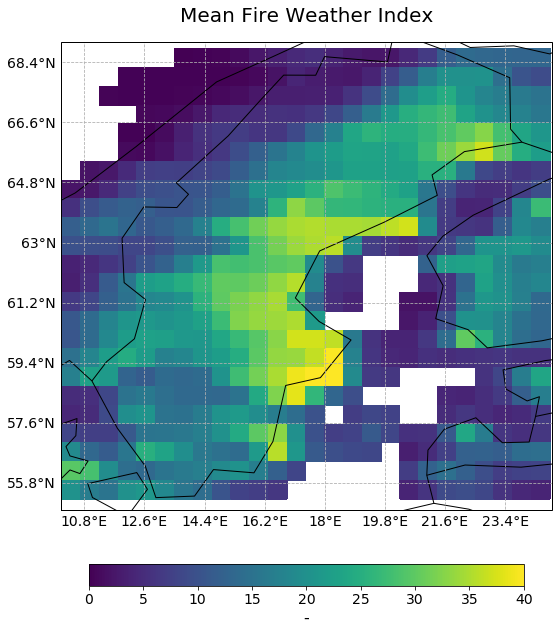

In [177]:
visualize_pcolormesh(mean_fwi,
                     mean_fwi.lon,
                     mean_fwi.lat,
                     ccrs.PlateCarree(),
                     'viridis',
                     '-',
                     'Mean Fire Weather Index',
                     0,
                     40,
                     10.1,
                     24.8,
                     55,
                     69,
                     log=False,
                     set_global=False)

#### 5. Calculate the `spread (standard deviation)` with xarray's function `std()`

In [ ]:
# Add you solution here





In [178]:
# Calculate spread (standard deviation), then plot
std_fwi = combined.std(dim = "time")
std_fwi

<xarray.DataArray 'fwi' (lat: 25, lon: 27)>
array([[        nan,         nan,         nan,         nan,         nan,
                nan,  0.17751354,  0.21522526,  0.45539767,  1.0625634 ,
         2.2769375 ,  3.0137513 ,  3.8273094 ,  4.332769  ,  3.158879  ,
         2.5812044 ,  2.4701781 ,  2.689118  ,  4.4075594 ,  6.3359566 ,
         9.023935  , 10.167557  ,  9.462308  ,  8.731553  ,  9.012817  ,
         9.278013  ,  9.116019  ],
       [        nan,         nan,         nan,  0.25009376,  0.18967283,
         0.22359417,  0.26994765,  0.41358423,  0.42946628,  0.559199  ,
         1.2522653 ,  2.5883467 ,  3.9195035 ,  3.1858768 ,  2.9887826 ,
         3.0203726 ,  3.882923  ,  6.4178166 ,  8.321955  , 10.850073  ,
        12.31502   , 12.431267  , 12.534385  ,  9.860666  ,  7.584061  ,
         6.796043  ,  7.160167  ],
       [        nan,         nan,  0.3533355 ,  0.33150792,  0.3273497 ,
         0.43354213,  0.72240007,  0.8521415 ,  1.0457817 ,  1.605822  ,
         3.190009  ,  3.7721179 ,  3.780385  ,  3.9950838 ,  4.129027  ,
         5.227176  ,  7.0503726 ,  8.49557   , 10.0588    , 10.0294895 ,
         9.969465  , 10.296095  ,  9.929733  ,  9.61593   ,  9.280263  ,
         8.788388  ,  7.9395337 ],
       [        nan,         nan,         nan,         nan,  0.90036666,
         1.1491545 ,  1.5996966 ,  2.8146062 ,  4.624362  ,  5.122002  ,
         5.457412  ,  5.562357  ,  5.3988643 ,  5.751415  ,  6.6226726 ,
         7.4373064 ,  7.92108   ,  7.994343  ,  8.054273  ,  8.945785  ,
         9.716191  , 10.083711  ,  9.550167  ,  9.126635  ,  8.835357  ,
         8.180926  ,  6.988354  ],
       [        nan,         nan,         nan,  0.29015025,  0.28873122,
         1.66411   ,  4.8520026 ,  6.2671623 ,  6.572005  ,  6.646355  ,
         6.1854577 ,  5.7675624 ,  6.795071  ,  8.64324   ,  9.3634615 ,
         7.960939  ,  7.3680787 ,  7.3214684 ,  7.726157  ,  8.389374  ,
         8.758427  ,  9.193341  ,  9.7698    ,  9.5311775 ,  9.202289  ,
         8.89949   ,  8.322288  ],
       [        nan,         nan,         nan,  1.1617376 ,  1.2951725 ,
         2.7096639 ,  4.635611  ,  5.6597033 ,  6.4410577 ,  6.932244  ,
         7.4199824 ,  7.7071075 ,  8.145226  ,  8.690898  ,  7.7020183 ,
         6.6229467 ,  6.5789533 ,  6.894469  ,  7.0746517 ,  7.176126  ,
         7.3318996 ,  7.326     ,  7.442555  ,  7.4866047 ,  7.351449  ,
         6.997639  ,  6.7402396 ],
       [        nan,  1.5283146 ,  2.4268186 ,  4.44907   ,  7.1687365 ,
         7.3609366 ,  6.838746  ,  7.3240094 ,  8.104405  ,  8.20523   ,
         8.646022  ,  8.523372  ,  7.1818185 ,  6.745057  ,  6.415996  ,
         6.3634925 ,  6.1973305 ,  5.9151273 ,  5.4993744 ,  5.368375  ,
         4.680429  ,  2.617964  ,  1.3309758 ,  1.8120985 ,  2.2549517 ,
         2.5939038 ,  2.993249  ],
       [ 1.564874  ,  2.093486  ,  3.842192  ,  6.9444566 ,  8.275022  ,
         8.319169  ,  8.897059  ,  9.116702  ,  9.251024  ,  8.865986  ,
         7.3046513 ,  7.865557  ,  7.9811554 ,  7.1471515 ,  6.5690594 ,
         5.813848  ,  5.4552755 ,  5.6029916 ,  6.130699  ,  3.7697842 ,
         1.492429  ,  0.97038925,  1.2042093 ,  1.6232277 ,  2.2679913 ,
         3.1239166 ,  4.5854635 ],
       [ 4.14196   ,  7.641327  ,  9.290346  , 10.243834  ,  9.974211  ,
         8.997183  ,  8.774354  ,  9.143102  ,  7.8239827 ,  5.800784  ,
         4.300517  ,  5.3748245 ,  6.9134965 ,  6.1088843 ,  6.0816975 ,
         5.638655  ,  5.3658023 ,  5.670746  ,  6.532579  ,  3.3169923 ,
         0.9415812 ,  0.85482645,  0.89283067,  1.4450431 ,  3.5359144 ,
         5.963347  ,  5.783841  ],
       [ 9.321814  , 10.8948345 , 12.587144  , 10.933796  ,  9.360802  ,
        10.307768  , 11.412192  , 12.408098  , 11.94229   , 10.880289  ,
         9.230144  ,  8.196351  ,  7.4032936 ,  6.3265    ,  6.3107014 ,
         6.3038344 ,  6.6784678 ,  5.6298695 ,  5.4104214 ,  2.5520067 ,
         1.4340781 ,  1.3170803 ,  1.3335109 ,  2.1952882 ,  3.9

#### 6. Visualize the `spread` of fwi with the function `visualize_pcolormesh`

In [ ]:
# Add your solution here





(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9b6d847e10>)

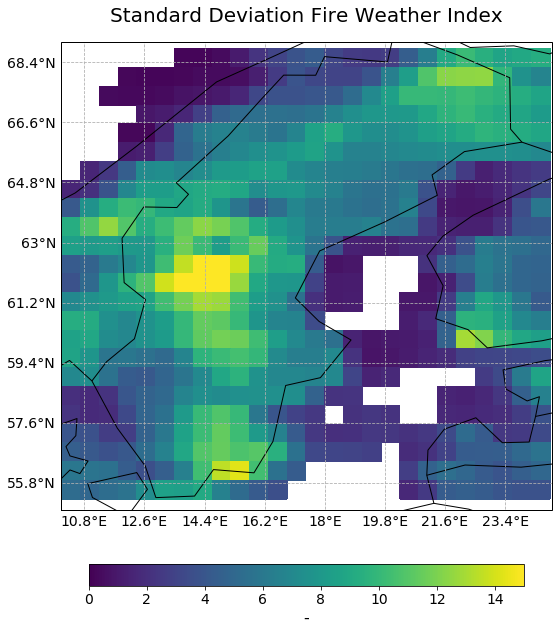

In [182]:
visualize_pcolormesh(std_fwi,
                     std_fwi.lon,
                     std_fwi.lat,
                     ccrs.PlateCarree(),
                     'viridis',
                     '-',
                     'Standard Deviation Fire Weather Index',
                     0,
                     15,
                     10.1,
                     24.8,
                     55,
                     69,
                     log=False,
                     set_global=False)

<br>

## <a id='geff_danger_classes'></a>GEFF Harmonized Danger Classes

According to EFFIS [documentation and user guidelines](https://effis.jrc.ec.europa.eu/about-effis/technical-background/fire-danger-forecast/):

- In most European countries, the core of the wildfire season starts on 1st of March and ends on 31st of October.
- The EFFIS network adopts the Canadian Forest Fire Weather Index (FWI) System as the method to assess the fire danger level in a harmonized way throughout Europe.
  
**European** Fire Danger Classes (FWI ranges, upper bound excluded):
  - Very low = 0 - 5.2
  - Low = 5.2 - 11.2 
  - Moderate = 11.2 - 21.3 
  - High = 21.3 - 38.0 
  - Very high = 38.0 - 50.0 
  - Extreme > 50.0

In ECMWF experience, the above thresholds are particularly suited to assess fire danger in southern Europe, e.g. in the Mediterranean Region. Some countries, tend to calibrate these thresholds depending on local vegetation characteristics and fire regimes. This require local knowledge and/or experimentation.
For instance, **Portugal** uses the following thresholds for local-level assessments of fire danger: 
  - Reduced risk = 8.4,
  - Moderate risk = 17.2,
  - High risk = 24.6,
  - Maximum risk = 38.3

Northern European countries might be more inclined to test **Canadian** threshold levels for the purpose of local-level assessments of fire danger:
  - Very Low = 0 - 1,
  - Low = 2 - 4,
  - Moderate = 5 - 8,
  - High = 9 - 16,
  - VeryHigh = 17 - 30,
  - Extreme > 30
  
As another example, in **Indonesia** threshold levels are (probably due to high level of humidity):
  - Very Low = 0 - 3,
  - Low = 3 - 5,
  - Moderate = 5 - 10,
  - High = 10 - 17,
  - VeryHigh = 17 - 28,
  - Extreme > 28

### Classified Forecasts

Raw FWI forecast values are expressed as a continuous rating in the range [0, +Inf[ (very rarely above 100). In order to aid decision makers raw forecasts are routinely converted into danger classes, based on the thresholds mentioned above, before being displayed by the EFFIS/GWIS viewer.

In this tutorial we are going to look at the predictive capability of the fire danger forecasts. Let us use the forecast issued on 14th July to see whether dangerous fire weather could have been predicted in the area where the Attica fires started burning on 23rd July (leadtime = 10 days).

Follow the individual steps as shown [here](./61_case_study_siberian_fires_summer_2019.ipynb#geff_fwi).

#### 1. Load the `RT HRES forecast for Sweden` with the xarray function `open_dataset()`

In [187]:
# Open raw RT HRES forecast for Sweden, issued 10 days before the fires
ds = xr.open_dataset("./eodata/geff/sweden/rt_hr/ECMWF_FWI_20180711_1200_hr_fwi_rt.nc")

# Plot the raw forecast, Day 10
ds.fwi[9]

<xarray.DataArray 'fwi' (lat: 200, lon: 209)>
array([[      nan,       nan,       nan, ..., 17.226824, 15.964631, 15.074407],
       [      nan,       nan,       nan, ..., 24.760998, 24.501692, 24.066296],
       [      nan,       nan,       nan, ..., 24.48506 , 24.319523, 24.170635],
       ...,
       [18.791824, 24.669744, 29.359118, ...,  8.361758,  8.870331,  9.154753],
       [12.839248, 13.3038  , 15.931919, ...,  8.475596,  8.596189,  8.619318],
       [12.442991, 11.603683, 11.313298, ...,  6.755947,  6.374301,  6.057116]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2018-07-20
  * lon      (lon) float32 10.125 10.1953125 10.265625 ... 24.679688 24.75
  * lat      (lat) float32 68.99824 68.92794 68.85764 ... 55.079086 55.008785
Attributes:
    units:    -
    title:    Fire Weather Index

#### 2. Visualize the forecast for day 10 (time index=9) with the function `visualize_pcolormesh`

In [ ]:
# Add your solution here





(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9b6c4987f0>)

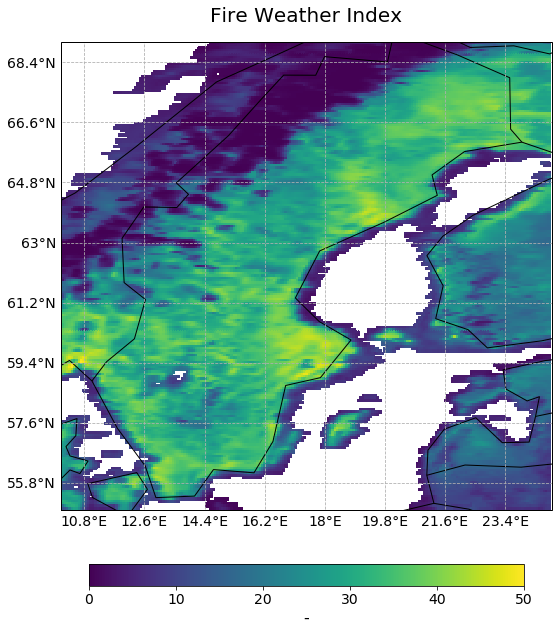

In [186]:
visualize_pcolormesh(ds.fwi[9],
                     ds.fwi[9].lon,
                     ds.fwi[9].lat,
                     ccrs.PlateCarree(),
                     'viridis',
                     ds.fwi[9].units,
                     ds.fwi[9].title,
                     0,
                     50,
                     10.1,
                     24.8,
                     55,
                     69,
                     log=False,
                     set_global=False)

#### 3. Reclassify the `fwi forecast` based on the fire index levels. For level threshold and colors, see the example in this [notebook](./32_geff_harmonized_danger_classes.ipynb).

In [ ]:
# Add your solution here





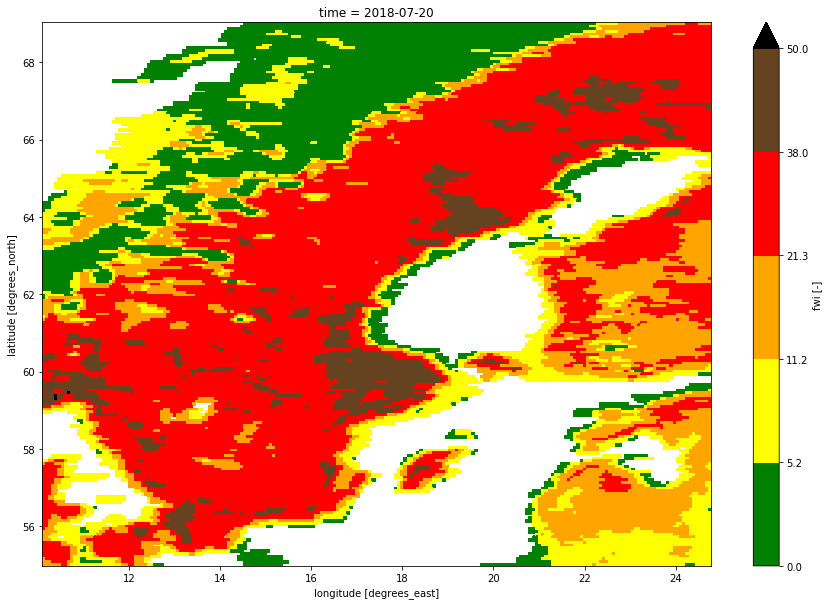

In [188]:
# Plot the re-classified forecast, Day 10
ds.fwi[9].plot(levels = [0.0, 5.2, 11.2, 21.3, 38.0, 50.0],
               colors = ["#008000", "#FFFF00", "#FFA500", "#FF0000", "#654321", "#000000"],
               label = ['Very low', 'Low', 'Moderate', 'High', 'Very high', 'Extreme'],
              figsize=(15,10));

#### 4. Highlight only cells with a very high fire danger

You can use the xarray function `where()` to mask the data based on a condition.

In [ ]:
# Add you solution here





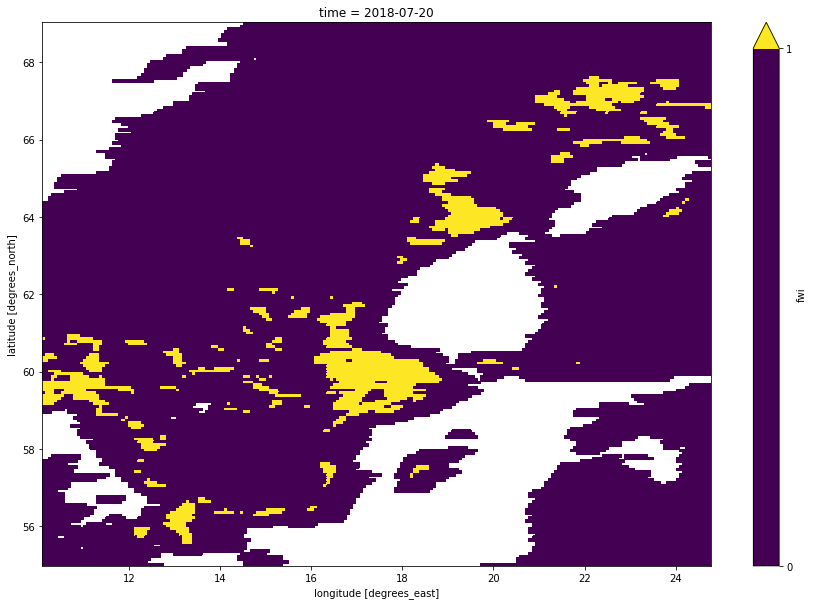

In [189]:
# Highlight only cells above Very High danger
ds_vh = xr.where(cond = ds < 38.0, x = 0, y = ds)
ds_vh.fwi[9].plot(levels = [0, 1], figsize=(15,10));

<br>

## <a id='lsa_saf_etfapar'></a>LSA SAF NRT EPS 10-days Fraction of Absorbed Photosynthetic Active Radiation (ETfAPAR)

Follow the individual steps as shown [here](./61_case_study_siberian_fires_summer_2019.ipynb#lsa_saf_fapar).

#### 1. Load the file `eodata/lsa_saf/sweden/HDF_LSASAF_M01-AVHR_ETFAPAR_Sweeden_201807150000` with `h5py.File()`

In [ ]:
# Add you solution here





In [97]:
file_name = './eodata/lsa_saf/sweden/HDF5_LSASAF_M01-AVHR_ETFAPAR_Sweeden_201807150000'
file = h5py.File(file_name,'r')



('FAPAR', <HDF5 dataset "FAPAR": shape (1501, 1093), type "<i2">)
('FAPAR QF', <HDF5 dataset "FAPAR QF": shape (1501, 1093), type "|i1">)
('FAPAR err', <HDF5 dataset "FAPAR err": shape (1501, 1093), type "<i2">)
('LAT', <HDF5 dataset "LAT": shape (1501, 1093), type "<i2">)
('LON', <HDF5 dataset "LON": shape (1501, 1093), type "<i2">)
('Z_Age', <HDF5 dataset "Z_Age": shape (1501, 1093), type "|i1">)


#### 2. Retrieve list of datasets in the file

for item in file.items():
    print(item)

#### 3. Retrieve the `FAPAR` dataset with the function `get()`

In [ ]:
# Add your solution here





In [98]:
fapar = file.get('FAPAR')
fapar

<HDF5 dataset "FAPAR": shape (1501, 1093), type "<i2">

#### 4. Define `missing_value` and `scaling_factor`

You can use the `attrs` function to retrieve the `MISSING_VALUE` attribute. Set the scaling facor to `10000.`.

In [ ]:
# Add your solution here





In [100]:
missing_value = fapar.attrs['MISSING_VALUE']
missing_value

scaling_factor=10000.

#### 5. Create a masked array with `np.ma.masked_values()`

In [ ]:
# Add your solution here





In [101]:
fapar_masked = np.ma.masked_values(fapar, missing_value)
fapar_masked = fapar_masked / scaling_factor
fapar_masked

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., 0.7661, 0.6967, 0.725],
        [--, --, --, ..., 0.6977, 0.7168, 0.7187],
        [--, --, --, ..., 0.7756, 0.7903, 0.6364]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-10)

#### 6. Visualize the masked array with matplotlib's `imshow()` function

In [ ]:
# Add your solution here





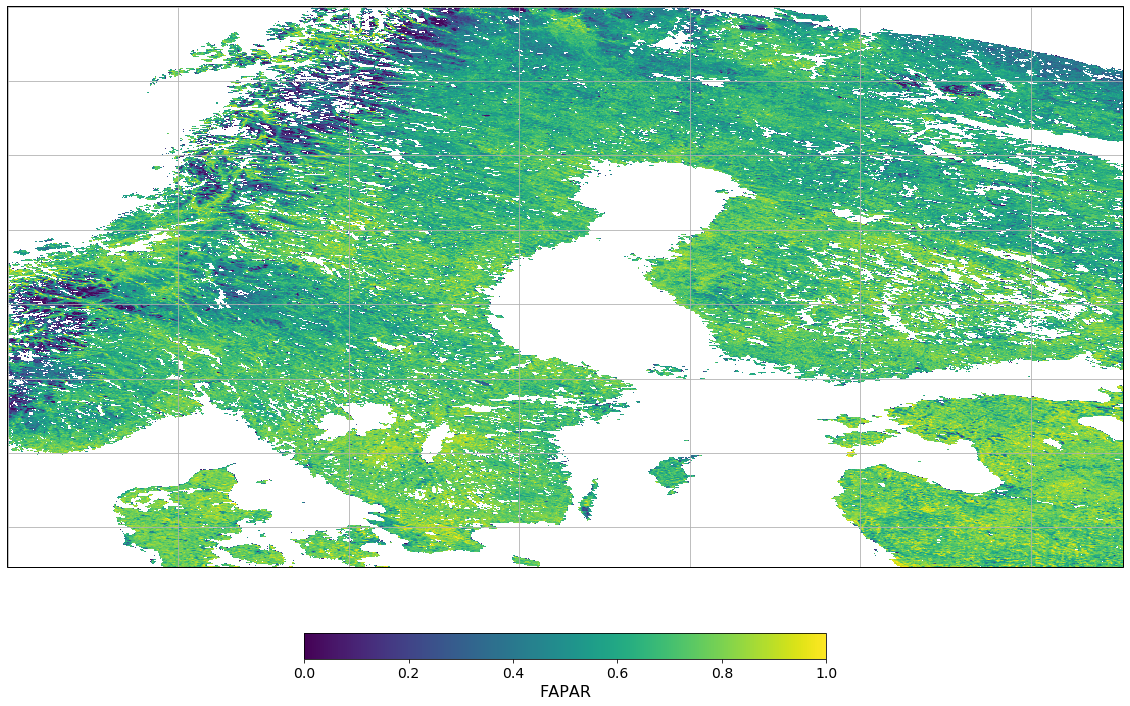

In [105]:
fig=plt.figure(figsize=(20, 12))

ax=plt.axes(projection=ccrs.Sinusoidal())
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
gl = ax.gridlines()

img1 = plt.imshow(fapar_masked,
                          cmap='viridis',
                          vmin=0,
                          vmax=1,
                          aspect='auto')

cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('FAPAR',fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.show()

## <a id='lsa_saf_edlst'></a>LSA SAF EPS Daily Land Surface Temperature (EDLST)

Follow the individual steps as shown [here](./61_case_study_siberian_fires_summer_2019.ipynb#lsa_saf_lst).

#### 1. Load the file with the function `h5py.File()`

In [86]:
file = h5py.File('./eodata/lsa_saf/sweden/HDF5_LSASAF_M01-AVHR_EDLST-DAY_Sweeden_201807170000', 'r')
file

for item in file.items():
    print(item)

('LAT', <HDF5 dataset "LAT": shape (1501, 1093), type "<i2">)
('LON', <HDF5 dataset "LON": shape (1501, 1093), type "<i2">)
('LST-day', <HDF5 dataset "LST-day": shape (1501, 1093), type "<i2">)
('QFLAG-day', <HDF5 dataset "QFLAG-day": shape (1501, 1093), type "|i1">)
('VZA-day', <HDF5 dataset "VZA-day": shape (1501, 1093), type "|i1">)
('aquisition_time-day', <HDF5 dataset "aquisition_time-day": shape (1501, 1093), type "<i2">)
('n-day', <HDF5 dataset "n-day": shape (1501, 1093), type "|i1">)


#### 2. Retrieve the dataset `LST-day` with the function `get()`

In [ ]:
# Add your solution here





In [87]:
lst_day = file.get('LST-day')
lst_day


<HDF5 dataset "LST-day": shape (1501, 1093), type "<i2">

#### 3. Retrieve the attributs `MISSING_VALUE` and `SCALING_FACTOR` with the `attrs[]` function

In [ ]:
# Add your solution here





In [88]:
missing_value = lst_day.attrs['MISSING_VALUE']
scaling_factor = lst_day.attrs['SCALING_FACTOR']
missing_value, scaling_factor

(-29999, 100.0)

#### 4. Create a masked array with the function `np.ma.masked_values()` and divide by the `scaling factor`

In [ ]:
# Add you solution here





In [89]:
lst_day_masked = np.ma.masked_values(lst_day, missing_value)
lst_day_masked = lst_day_masked / scaling_factor
lst_day_masked

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-29999)

#### 5. Visualize the masked array with matplotlib's `imshow()` function

In [ ]:
# Add your solution here





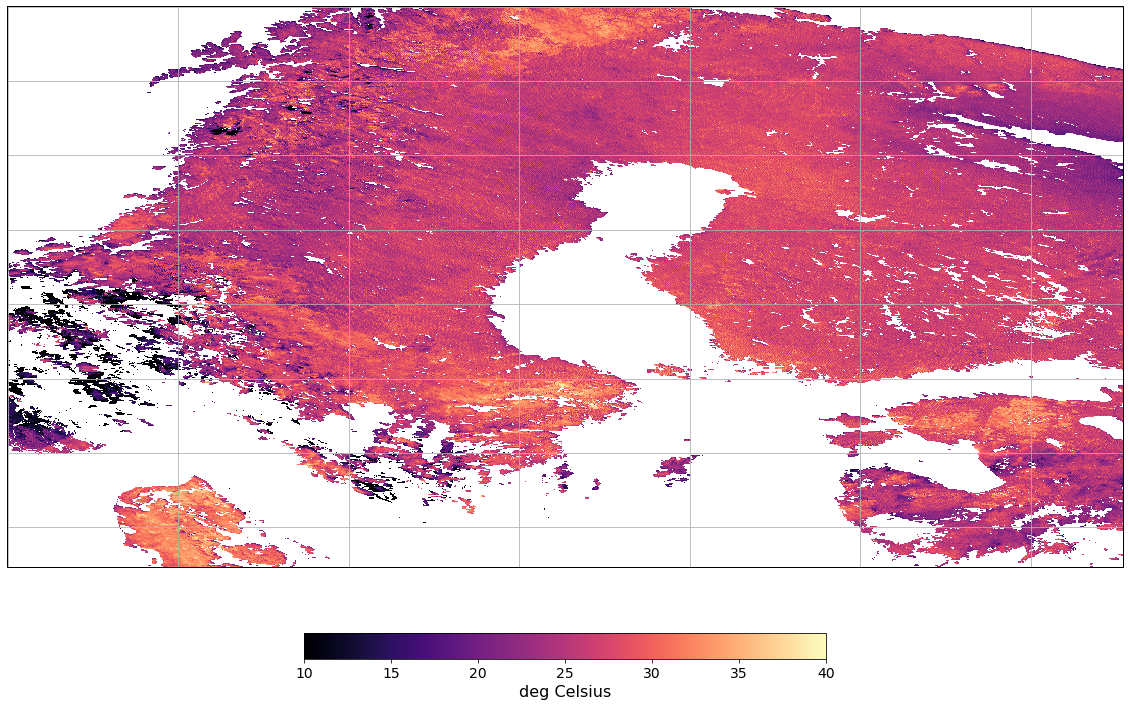

In [96]:
fig=plt.figure(figsize=(20, 12))

ax=plt.axes(projection=ccrs.Sinusoidal())
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
gl = ax.gridlines()

img1 = plt.imshow(lst_day_masked,
                          cmap='magma',
                          vmin=10,
                          vmax=40,
                          aspect='auto')

cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('deg Celsius',fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.show()

<br>

## <a id='lsa_saf_frp_pixel'></a>LSA SAF Fire Radiative Power (FRP) Pixel 

Follow the individual steps as shown [here](./41_lsa-saf.ipynb#frp).

#### 1. Load the file containg the `LSA SAF Fire Radiative Power (FRP) Pixel` information

In [6]:
file = h5py.File('./eodata/lsa_saf/sweden/HDF5_LSASAF_MSG_FRP-PIXEL-ListProduct_MSG-Disk_201807161830', 'r')

for item in file.items():
    print(item)

('ABS_LINE', <HDF5 dataset "ABS_LINE": shape (505,), type "<i2">)
('ABS_PIXEL', <HDF5 dataset "ABS_PIXEL": shape (505,), type "<i2">)
('ACQTIME', <HDF5 dataset "ACQTIME": shape (505,), type "<i2">)
('BT_MIR', <HDF5 dataset "BT_MIR": shape (505,), type "<i2">)
('BT_TIR', <HDF5 dataset "BT_TIR": shape (505,), type "<i2">)
('BW_BTD', <HDF5 dataset "BW_BTD": shape (505,), type "<i2">)
('BW_BT_MIR', <HDF5 dataset "BW_BT_MIR": shape (505,), type "<i2">)
('BW_NUMPIX', <HDF5 dataset "BW_NUMPIX": shape (505,), type "<i2">)
('BW_SIZE', <HDF5 dataset "BW_SIZE": shape (505,), type "<i2">)
('ERR_ATM_TRANS', <HDF5 dataset "ERR_ATM_TRANS": shape (505,), type "<i2">)
('ERR_BACKGROUND', <HDF5 dataset "ERR_BACKGROUND": shape (505,), type "<i2">)
('ERR_FRP_COEFF', <HDF5 dataset "ERR_FRP_COEFF": shape (505,), type "<i2">)
('ERR_RADIOMETRIC', <HDF5 dataset "ERR_RADIOMETRIC": shape (505,), type "<i2">)
('ERR_VERT_COMP', <HDF5 dataset "ERR_VERT_COMP": shape (505,), type "<i2">)
('FIRE_CONFIDENCE', <HDF5 data

#### 2. Retrieve `FRP` dataset with the fuction `get()`

In [ ]:
# Add your solution here





In [7]:
frp = file.get('FRP')
frp

<HDF5 dataset "FRP": shape (505,), type "<i4">

#### 3. Retrieve `SCALING_FACTOR` and `MISSING_VALUE` with the function `attrs[]`

In [ ]:
# Add your solution here





In [108]:
scaling_factor = frp.attrs['SCALING_FACTOR']
missing_value = frp.attrs['MISSING_VALUE']


masked_array(data=[960.7, 1637.9, 278.8, 218.0, 309.7, 49.6, 33.8, 34.5,
                   36.8, 89.6, 87.1, 75.3, 76.5, 89.2, 24.4, 83.8, 42.3,
                   19.9, 11.5, 15.9, 16.7, 11.5, 33.3, 23.1, 32.6, 34.1,
                   13.4, 14.8, 22.5, 20.0, 18.6, 23.4, 18.0, 45.1, 14.9,
                   28.2, 37.2, 48.4, 57.4, 182.0, 61.8, 24.9, 265.3,
                   704.9, 274.4, 28.5, 113.4, 13.9, 20.5, 31.0, 24.8,
                   30.4, 30.3, 23.9, 18.6, 24.3, 34.0, 21.6, 27.8, 45.8,
                   16.0, 17.4, 32.0, 16.9, 13.7, 13.5, 24.9, 15.7, 178.1,
                   26.2, 25.1, 56.6, 21.1, 17.0, 91.8, 29.8, 102.2, 69.8,
                   21.9, 24.3, 32.7, 23.2, 81.4, 29.3, 23.7, 24.2, 22.9,
                   24.0, 47.5, 61.2, 20.3, 33.8, 38.3, 65.2, 28.3, 102.4,
                   61.6, 33.0, 33.3, 59.9, 339.5, 211.9, 49.7, 27.8, 69.8,
                   47.8, 70.2, 31.4, 29.4, 44.3, 30.2, 30.4, 151.0, 657.2,
                   652.8, 52.3, 373.0, 525.8, 519.3

#### 4. Mask the `frp` values and divide by the `scaling factor` with the function `np.ma.masked_values()`

In [ ]:
# Add your solution here





In [ ]:
frp_masked = np.ma.masked_values(frp, missing_value)
frp_masked = frp_masked / scaling_factor
frp_masked

#### 5. Repeat the same steps as above, but retrieve the `LATITUDE` data

In [ ]:
# Add your solution here





In [109]:
lat = file.get('LATITUDE')
lat

scaling_factor = lat.attrs['SCALING_FACTOR']
missing_value = lat.attrs['MISSING_VALUE']

lat_masked = np.ma.masked_values(lat[()], missing_value)
lat_masked = lat_masked / scaling_factor
lat_masked

masked_array(data=[61.81, 61.81, 61.82, 61.72, 61.72, 43.94, 36.29, 36.25,
                   35.56, 31.03, 30.29, 30.29, 30.25, 30.25, 14.17, 13.62,
                   13.59, 9.94, 9.8, 9.71, 8.69, 7.36, 6.91, 5.85, 5.61,
                   3.88, 1.2, 0.52, 0.36, 0.36, 0.36, 0.36, -1.17, -1.17,
                   -1.2, -1.2, -1.42, -1.42, -1.5, -1.5, -1.5, -1.53,
                   -1.53, -1.53, -1.53, -1.53, -1.56, -1.56, -1.56, -1.64,
                   -1.67, -1.77, -1.8, -1.8, -1.83, -1.94, -1.99, -1.99,
                   -2.02, -2.02, -2.02, -2.04, -2.22, -2.27, -2.27, -2.47,
                   -2.5, -2.56, -3.18, -3.31, -3.34, -4.17, -4.04, -4.04,
                   -4.23, -4.05, -4.26, -4.26, -4.08, -4.09, -4.98, -4.79,
                   -5.01, -5.01, -4.82, -4.86, -4.97, -4.97, -5.05, -5.05,
                   -5.08, -5.11, -5.44, -5.44, -5.47, -5.74, -5.74, -5.52,
                   -5.52, -5.77, -5.77, -5.77, -5.52, -5.55, -5.8, -5.8,
                   -5.55, -5.55, -5.55

#### 6. Repeat the same steps as above, but retrieve the `LONGITUDE` data

In [ ]:
# Add your solution here





In [110]:
lon = file.get('LONGITUDE')
lon

scaling_factor = lon.attrs['SCALING_FACTOR']
missing_value = lon.attrs['MISSING_VALUE']

lon_masked = np.ma.masked_values(lon[()], missing_value)
lon_masked = lon_masked / scaling_factor
lon_masked

masked_array(data=[14.38, 14.44, 14.51, 14.33, 14.4, 25.14, 7.11, 7.11,
                   6.21, 47.28, 47.71, 47.77, 47.68, 47.74, 40.33, 40.78,
                   40.77, -12.36, -11.59, 0.05, -12.93, 3.38, 36.59,
                   -0.73, 37.11, 34.33, 14.9, 14.93, 15.19, 15.21, 15.24,
                   22.0, 14.05, 14.08, 14.05, 14.08, 29.19, 29.22, 29.22,
                   29.26, 29.29, 29.16, 29.22, 29.26, 29.29, 29.36, 29.26,
                   29.29, 29.36, 15.11, 15.11, 35.04, 35.04, 35.08, 35.11,
                   35.04, 14.26, 14.29, 14.26, 14.29, 14.32, 14.29, 33.96,
                   14.89, 14.91, 34.29, 34.29, 34.36, -47.62, 16.05,
                   16.05, -47.86, 28.21, 28.81, -48.12, 26.19, -48.12,
                   -48.07, 26.19, 27.62, -44.82, 24.51, -44.82, -44.78,
                   24.51, 26.49, 26.2, 26.24, 27.31, 27.34, 25.76, 25.76,
                   26.07, 26.1, 26.1, -47.8, -47.75, 28.26, 28.29, -47.86,
                   -47.81, -47.76, 25.59, 28.26, -4

#### 7. Define the classification levels and colors

In [115]:
frp_cm = ListedColormap([[0, 0, 255./255.],
                                 [176./255., 196./255., 222./255.],
                                 [255./255., 255./255., 0],
                                 [1., 140./255., 0],
                                 [178./255., 34./255., 34./255.],
                                 [1, 0, 0]])
bounds = [0, 30, 40, 60, 80, 120, 500]
norm = BoundaryNorm(bounds, frp_cm.N)


#### 8. Visualize the masked `frp` array with matplotlibs `scatter()` function

In [ ]:
# Add your solution here





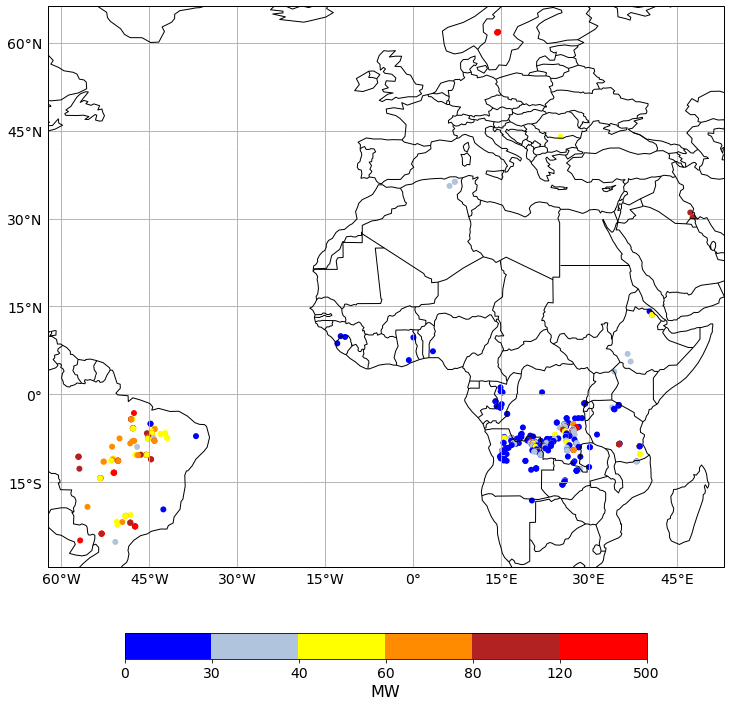

In [116]:
fig=plt.figure(figsize=(20, 12))

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(zorder=3)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=3)
gl = ax.gridlines()
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}


img1 = plt.scatter(lon_masked,lat_masked, c=frp_masked,
                   edgecolors='none',
                   cmap=frp_cm,
                   norm=norm,
                   zorder=2)


cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('MW',fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.show()

## <a id='lsa_saf_ndvi'></a> LSA SAF Normalized Difference Vegeation Index (NDVI)

As the processing steps of the `LSA SAF NDVI` data are a bit more complex, we will subsequently only show the processing steps, without exercises applied.

#### 1. Define path to the `img` file

In [117]:
file = './eodata/lsa_saf/sweden/METOP_AVHRR_20180721_S10_EUR_NDV.img'

#### 2. Retrieve the `metadata` of the file and store them in a dictionary

In [123]:
hdr = os.path.splitext(file)[0]+'.hdr'
hdr
hdr_set = {}

myfileobj = open(hdr, "r")    
for line in myfileobj.readlines():   
    line = [x.strip() for x in line.split(' = ')]
    if len(line) > 1:
        if line[0] == 'values':
            line[0] = 'VALUES'
        hdr_set[line[0]] = line[1]

hdr_set

{'description': '{METOP-AVHRR, 10-daily synthesis, 20180721-20180731, NDVI, processing by VITO-Belgium }',
 'samples': '8176',
 'lines': '5600',
 'bands': '1',
 'interleave': 'BSQ',
 'file type': 'ENVI Standard',
 'data type': '1',
 'sensor type': 'METOP-AVHRR',
 'map info': '{ Geographic Lat/Lon, 1.5, 1.5, -11.0, 75.0,  0.0089285714,  0.0089285714, WGS-84, units=Degrees }'}

#### 3. Get `datatype` from the `hdr` file and define the `dtype`

In [124]:
hdrdtype =  hdr_set['data type'] #get datatype from hdr_set
envidtypelib = hdrdtypelib()
dtype = envidtypelib[hdrdtype]

#### 4. Load data from the `img` file with the function `np.fromfile()`

In [125]:
#get DN from image
data=np.fromfile(file,dtype=dtype)
#convert to 2D array
data.shape=(-1,int(hdr_set['samples']))
data

#Convert to float64 datatype
data_2 = np.float64(data)
data_2

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [ 44.,  46.,  45., ..., 255., 255., 255.],
       [ 45.,  45.,  45., ..., 255., 255., 255.],
       [ 44.,  44.,  44., ..., 255., 255., 255.]])

#### 5. Create a masked array to flag out the missing values with `np.ma.masked_values()`

In [126]:
missing_value = np.max(data_2)
data_masked = np.ma.masked_values(data_2, missing_value)
data_masked_4 = 0.004*data_masked-0.08
data_masked_4

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [0.09599999999999999, 0.104, 0.09999999999999999, ..., --, --,
         --],
        [0.09999999999999999, 0.09999999999999999, 0.09999999999999999,
         ..., --, --, --],
        [0.09599999999999999, 0.09599999999999999, 0.09599999999999999,
         ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=255.0)

#### 6. Visualize the `NDVI` data with matplotlib's function `imshow()`

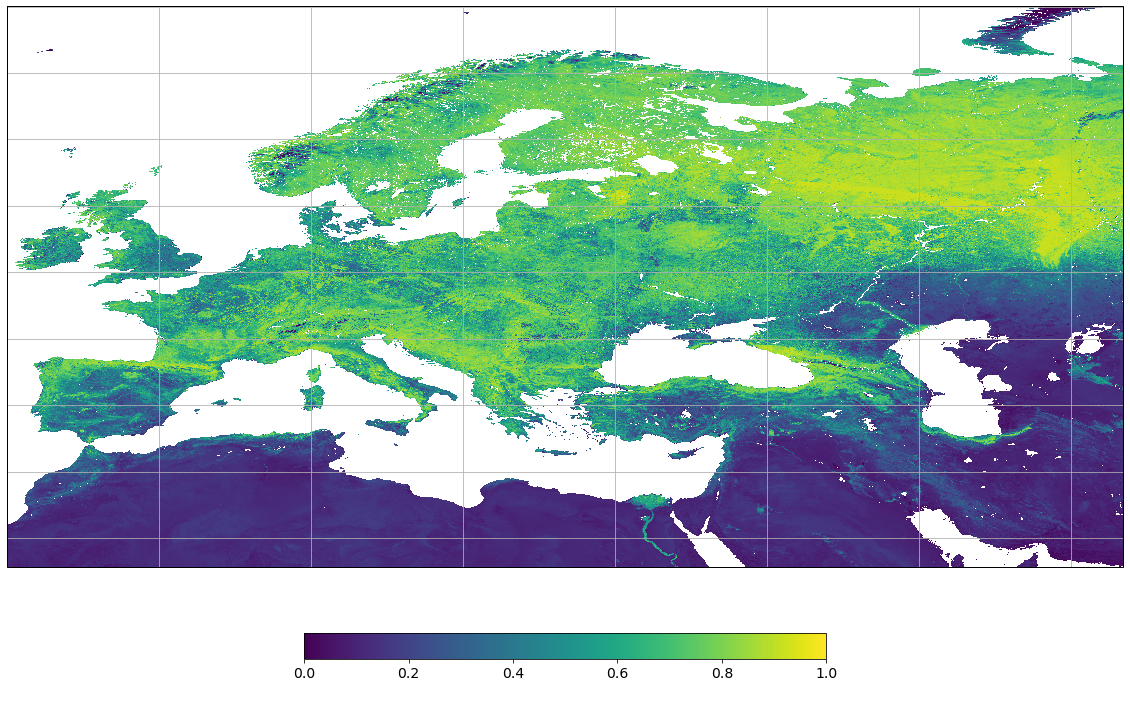

In [127]:
fig=plt.figure(figsize=(20, 12))

ax=plt.axes(projection=ccrs.Sinusoidal())
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
gl = ax.gridlines()


img1 = plt.imshow(data_masked_4,
                          vmin=0,
                          vmax=1,
                          aspect='auto')


cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(' ',fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.show()

<br>

<a href="./61_case_study_siberian_fires_summer_2019.ipynb"><< 61 - Case study Siberian Fires Summer 2019 </a><span style="float:right;"><a href="./00_index.ipynb">Index >></a></span>

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.